# Iris Predictions

In [1]:
import sys
import os

# Get the absolute path of the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the parent directory to sys.path
sys.path.insert(0, parent_dir)

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from src.decision_tree_classifier_from_scratch import DecisionTreeClassifier as DTC_from_scratch

## Data Preprocessing

In [3]:
# Import data
dataset = load_iris(as_frame=True)
dataset = dataset.frame
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


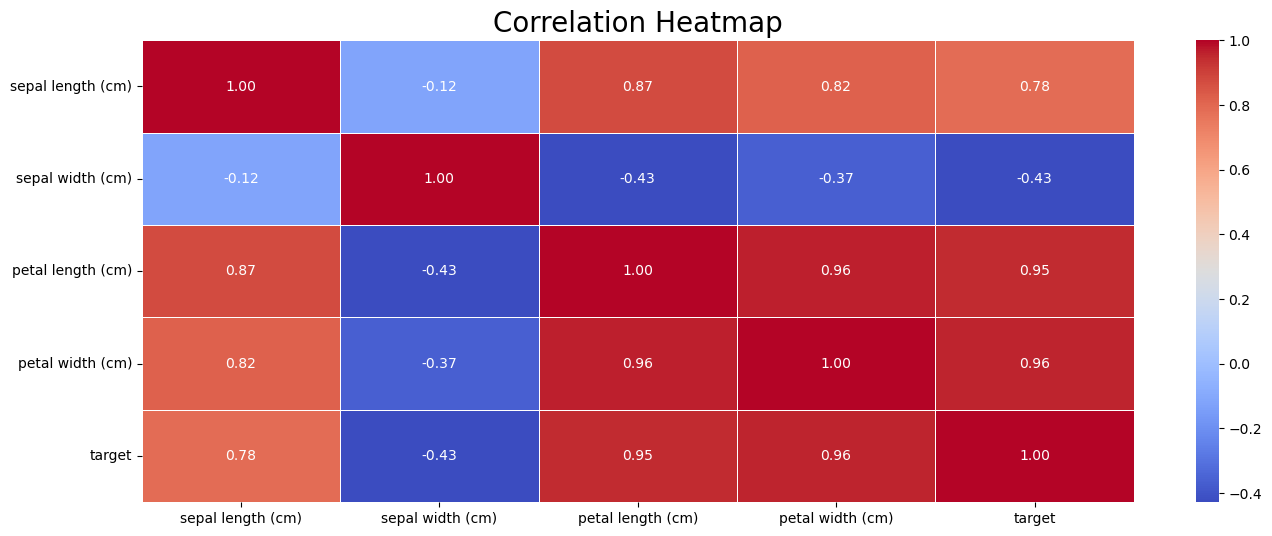

In [6]:
# Correlation heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5) 
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

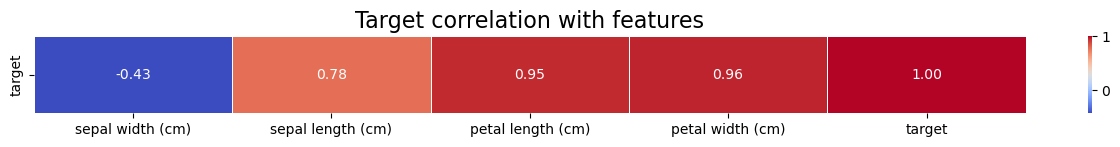

In [7]:
# Correlation for "target"
diagnosis_corr = pd.DataFrame(dataset.corr()['target'].sort_values(ascending=True))
plt.figure(figsize=(16, 1))
sns.heatmap(diagnosis_corr.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5) 
plt.title("Target correlation with features", fontsize=16)
plt.show()

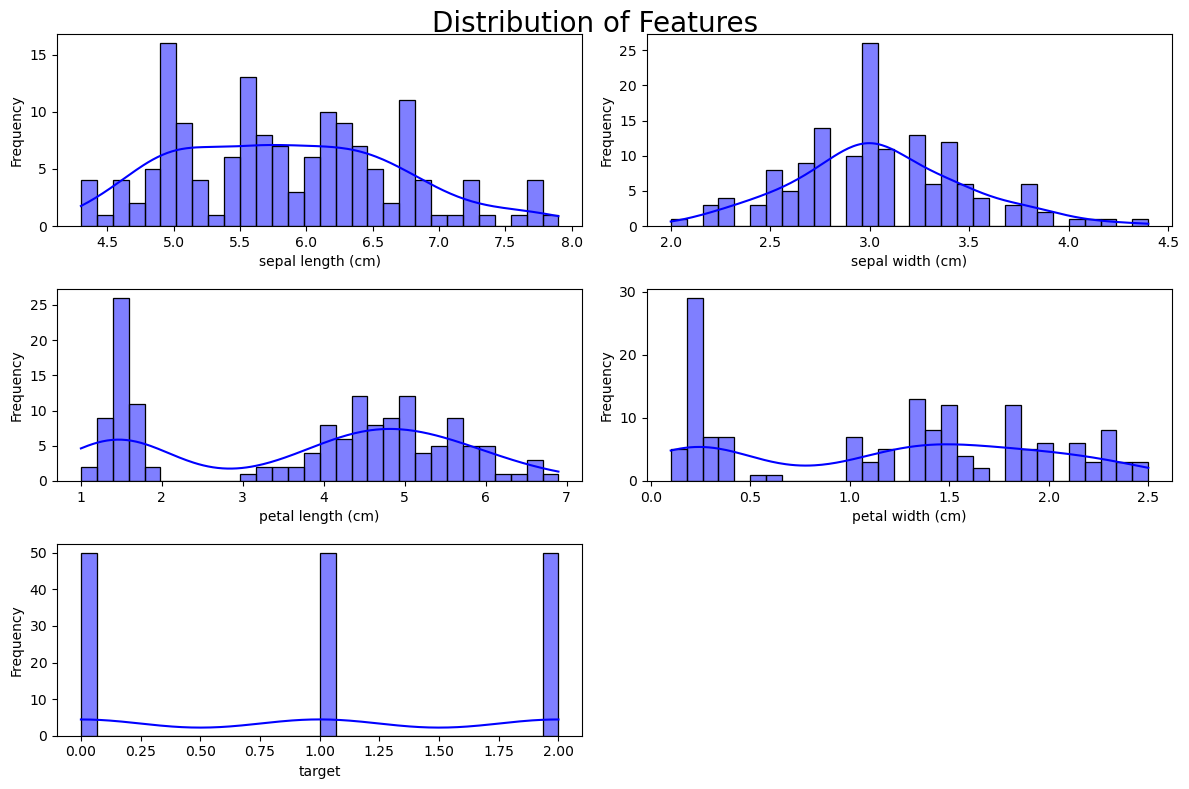

In [8]:
# Distribution of each feature 
num_features = dataset.columns
fig, axes = plt.subplots(nrows=len(num_features)//2 + 1, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for i, feature in enumerate(num_features):
    sns.histplot(dataset[feature], kde=True, bins=30, color='blue', ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
fig.suptitle("Distribution of Features", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Model Training & Evaluation

In [9]:
# Extract features and targets
Y = np.array(dataset.target)
X = np.array(dataset.drop(columns=['target']))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [10]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Dictionary of models to train
models = {
    "Logistic Regression (Sklearn)": LogisticRegression(),
    "Decision Tree Classifier (Scratch)": DTC_from_scratch(criterion='gini', max_depth=2, min_samples_split=2),
    "Decision Tree Classifer (Sklearn)": DecisionTreeClassifier()
}

In [12]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    # Compute performance metrics
    acc = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='weighted')
    results[name] = {"Accuracy": acc, "F1-Score": f1,
                     "Precision": precision, "Recall": recall
                     }

    print(f"\n{name}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Precision-Score: {precision:.4f}")
    print(f"Recall-Score: {recall:.4f}")


Logistic Regression (Sklearn):
Accuracy: 1.0000
F1-Score: 1.0000
Precision-Score: 1.0000
Recall-Score: 1.0000

Decision Tree Classifier (Scratch):
Accuracy: 0.9556
F1-Score: 0.9553
Precision-Score: 0.9615
Recall-Score: 0.9556

Decision Tree Classifer (Sklearn):
Accuracy: 1.0000
F1-Score: 1.0000
Precision-Score: 1.0000
Recall-Score: 1.0000


In [13]:
# Compare model performance
print("\nModel Performance Comparison:")
performance_df = pd.DataFrame(results).T
print(performance_df)


Model Performance Comparison:
                                    Accuracy  F1-Score  Precision    Recall
Logistic Regression (Sklearn)       1.000000  1.000000   1.000000  1.000000
Decision Tree Classifier (Scratch)  0.955556  0.955291   0.961481  0.955556
Decision Tree Classifer (Sklearn)   1.000000  1.000000   1.000000  1.000000



Evaluating Decision Tree Classifier (Scratch) with Confusion Matrix


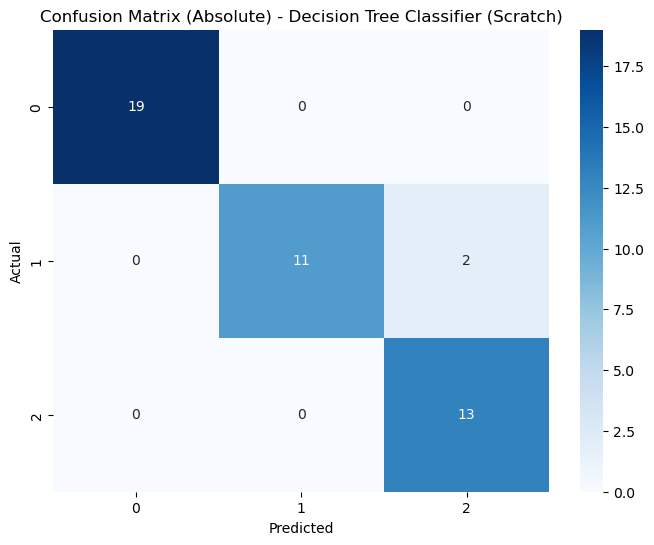

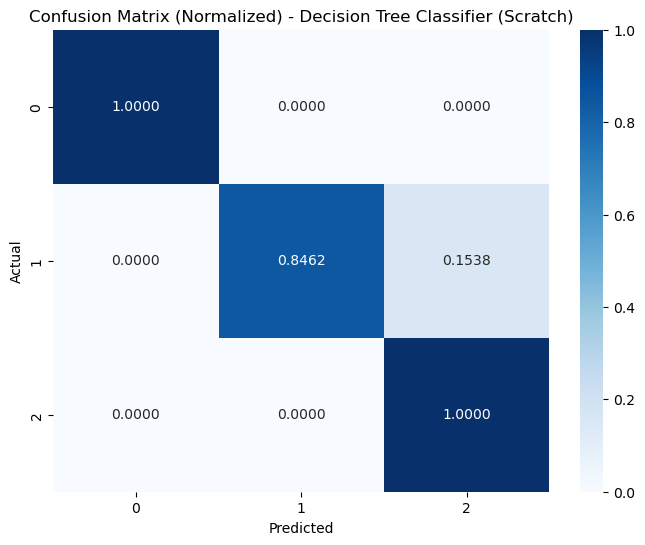

In [14]:
dtc_scratch_name = "Decision Tree Classifier (Scratch)"
if dtc_scratch_name in models:
    print(f"\nEvaluating {dtc_scratch_name} with Confusion Matrix")
dtc_scratch_model = models[dtc_scratch_name]
dtc_scratch_pred = dtc_scratch_model.predict(X_test)

conf_matrix = confusion_matrix(Y_test, dtc_scratch_pred)
class_labels = np.unique(Y) 

# Plot the confusion matrix (absolute values)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"Confusion Matrix (Absolute) - {dtc_scratch_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype("float") / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix (normalized values)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".4f", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"Confusion Matrix (Normalized) - {dtc_scratch_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()